<a href="https://colab.research.google.com/github/Dangerdrive/42/blob/main/medium0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cancer.csv to cancer.csv


In [ ]:
# import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Read the data from the CSV file
df= pd.read_csv('cancer.csv')



In [ ]:
# Display the first few rows of the dataset
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
# Generate descriptive statistics for the dataset
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


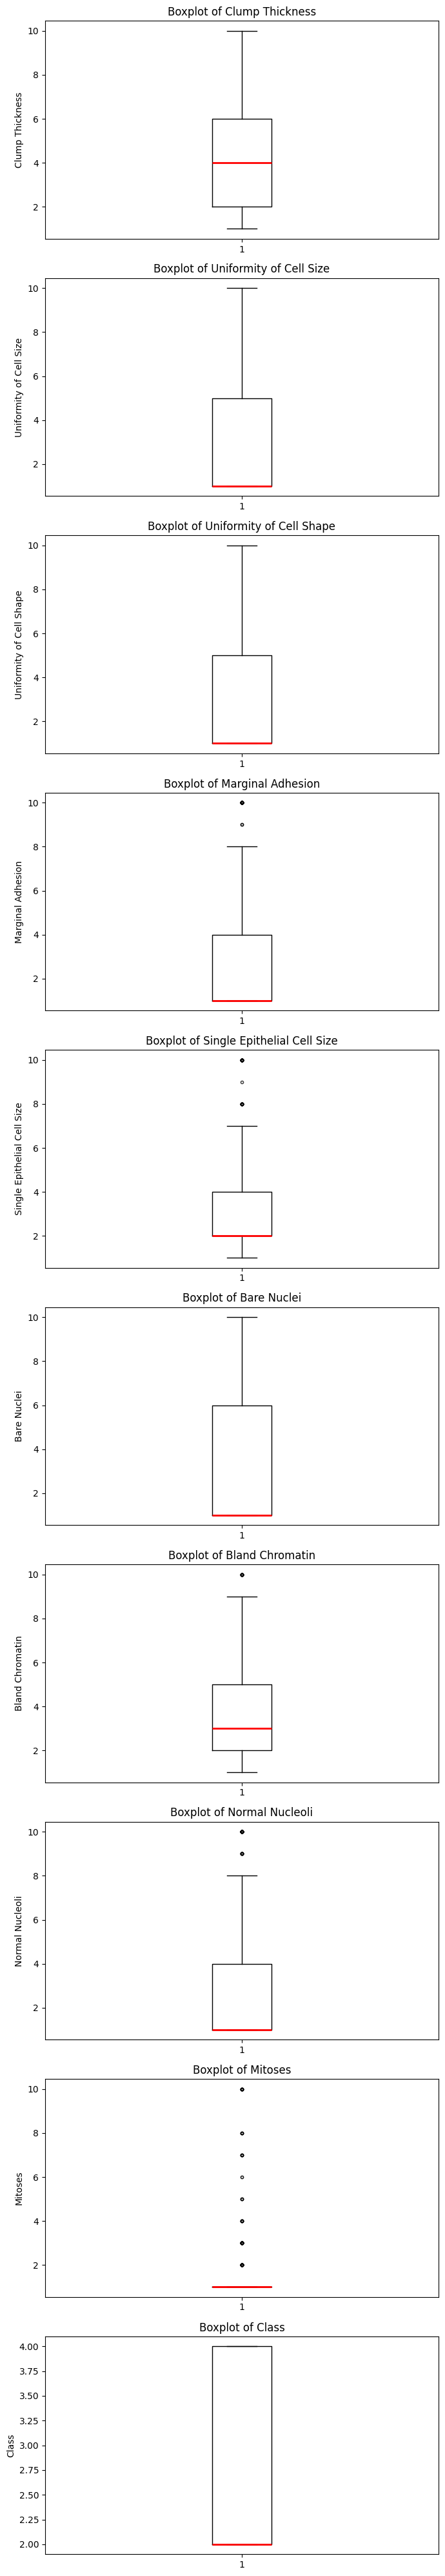

In [ ]:
# Visualize box plots for each numerical feature
# Create subplots
fig, axes = plt.subplots(len(df.columns), 1, figsize=(7, 4*len(df.columns)))

# If there's only one column, axes won't be an array
if len(df.columns) == 1:
    axes = [axes]

for i, col in enumerate(df.columns):
    # Use matplotlib boxplot for more control
    bp = axes[i].boxplot(df[col].dropna(),
                        patch_artist=False,  # Don't fill boxes with color
                        widths=0.15,          # Make boxes thinner
                        medianprops=dict(color='red', linewidth=2),  # Color median red
                        boxprops=dict(linewidth=1),
                        whiskerprops=dict(linewidth=1),
                        capprops=dict(linewidth=1),
                        flierprops=dict(marker='o', markersize=3, alpha=0.5))

    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

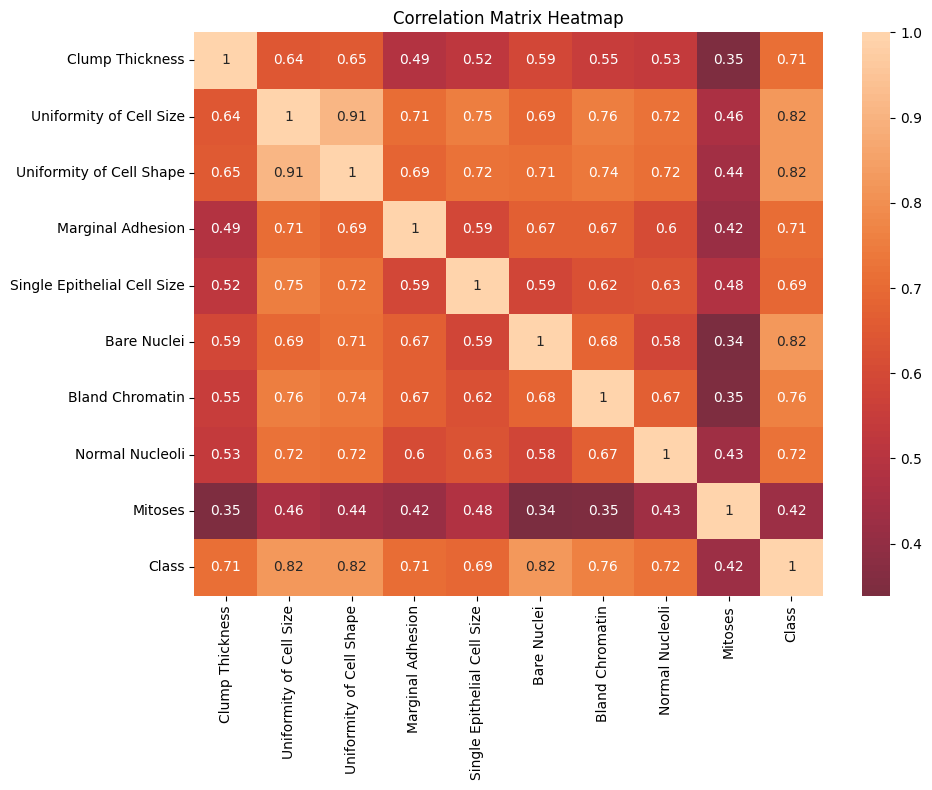

In [ ]:
# Visualize the correlation matrix using a heatmap
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# Separate features and target variable

X = df.drop('Class', axis=1)  # Features (all columns except 'Class')
y = df['Class']               # Target variable


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the lengths of training and testing sets
print("Training set length:", len(X_train), "\nTesting set length:", len(X_test))
print("Training labels length:", len(y_train), "\nTesting labels length:", len(y_test))

Training set length: 546 
Testing set length: 137
Training labels length: 546 
Testing labels length: 137


In [ ]:
# Import LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create an instance of LogisticRegression
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the testing data
prediction = logreg.predict(X_test)

# Calculate and print the accuracy score of the model
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

Accuracy: 0.9635036496350365


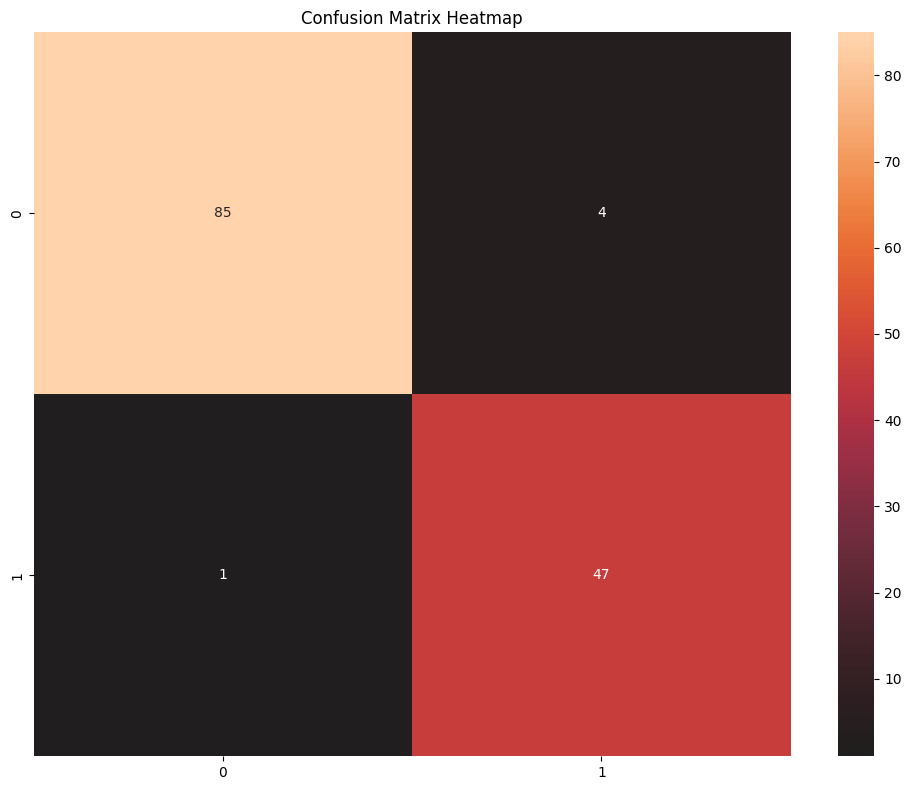

Confusion Matrix:
[[85  4]
 [ 1 47]]


In [30]:
# Import confusion_matrix from scikit-learn
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, prediction)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, center=0)
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

#             Previsto
#            Negativo  Positivo
# Real -------------------------
# Negativo |    TN   |    FP   |
# Positivo |    FN   |    TP   |

# True Negatives (TN) = 85: 85 casos benignos foram corretamente classificados como benignos
# False Positives (FP) = 4: 4 casos benignos foram erroneamente classificados como malignos (falso positivo)
# False Negatives (FN) = 1: 1 caso maligno foi erroneamente classificados como benignos (falso negativo) ⚠️
# True Positives (TP) = 47: 47 casos malignos foram corretamente classificados como malignos

In [ ]:
# Import classification_report from scikit-learn
from sklearn.metrics import classification_report

# Generate the classification report
clr = classification_report(y_test, prediction)

# Print the classification report
print("Classification Report:")
print(clr)

Classification Report:
              precision    recall  f1-score   support

           2       0.99      0.96      0.97        89
           4       0.92      0.98      0.95        48

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137



In [ ]:
# # Cálculo das métricas
# total = 85 + 4 + 1 + 47  # = 137

# accuracy = (85 + 47) / 137 * 100      # ≈ 96.4% - Acurácia geral
# precision = 47 / (47 + 4) * 100       # ≈ 92.2% - Dos preditos como cancer, 92.2% realmente têm
# recall = 47 / (47 + 1) * 100          # ≈ 97.9% - Dos que têm cancer, 97.9% foram detectados
# specificity = 85 / (85 + 4) * 100     # ≈ 95.5% - Dos saudáveis, 95.5% foram corretamente identificados